# Explore severity

In [14]:
dataset = "nist"
tested = "spec_val"
kind= "in_database"

probs = [0, .01, .03, .05, .08, .1, .15, .2, .3, .5]

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
def calc_for_top(top, n_pred_ikeys_per_k, y_ikeys):
    res = []
    for k in range(len(n_pred_ikeys_per_k)):
        corr = 0
        tot = 0
        for i in range(len(y_ikeys)):
            if n_pred_ikeys_per_k[k][i] is None:
                continue
            if y_ikeys[i] in n_pred_ikeys_per_k[k][i][:top]:
                corr += 1
            tot += 1
        res.append((corr/tot, tot))
    return res

def plot_top_rec(tops, n_pred_ikeys_per_k, y_ikeys, title=None):
    plt.figure(figsize=(5,3))
    for top in tops:
        recall = [*map(lambda x: x[0], calc_for_top(top, n_pred_ikeys_per_k, y_ikeys))]
        sns.lineplot(y=recall, x=range(1, len(recall)+1))
    plt.legend([f"recall@{top}" for top in tops])
    plt.ylim(0,1)
    plt.ylabel("recall")
    plt.xlabel("k")
    plt.grid(color = 'whitesmoke', linestyle = '-')

    plt.title(title)

def plot_miss_rec(tops, n_pred_ikeys_per_p, y_ikeys, probs, title=None):
    plt.figure(figsize=(5,3))
    for top in tops:
        recall = [*map(lambda x: x[0], calc_for_top(top, n_pred_ikeys_per_p, y_ikeys))]
        sns.lineplot(y=recall, x=probs)
    plt.legend([f"recall@{top}" for top in tops])
    plt.ylim(0,1)
    plt.ylabel("recall")
    plt.xlabel("p")
    plt.grid(color = 'whitesmoke', linestyle = '-')

    plt.title(title)


## Cosine

In [17]:
p_name = "cosine"

n_pred_ikeys_per_m = np.load(f"matches/{kind}/{dataset}/{tested}/{p_name}/n_pred_ikeys_per_p.npy")
n_pred_ikeys_per_k = np.load(f"matches/{kind}/{dataset}/{tested}/{p_name}/n_pred_ikeys_per_k.npy", allow_pickle=True)
y_ikeys = np.load(f"matches/{kind}/{dataset}/{tested}/{p_name}/y_ikeys.npy")

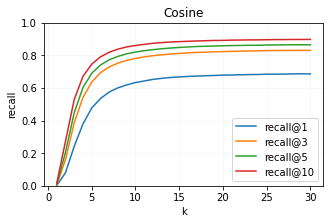

In [18]:
tops = [1,3,5,10]
plot_top_rec(tops, n_pred_ikeys_per_k, y_ikeys, title="Cosine")
plt.savefig("figures/severity/topk_cos.pdf", bbox_inches='tight')

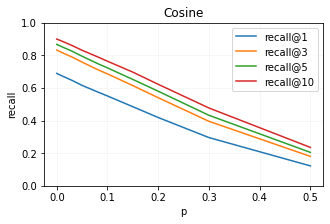

In [19]:
plot_miss_rec(tops, n_pred_ikeys_per_m, y_ikeys, probs, title="Cosine")
plt.savefig("figures/severity/missm_cos.pdf",bbox_inches='tight')

## wCosine

In [20]:
p_name = "cosine_weighted"

n_pred_ikeys_per_m_w = np.load(f"matches/{kind}/{dataset}/{tested}/{p_name}/n_pred_ikeys_per_p.npy")
n_pred_ikeys_per_k_w = np.load(f"matches/{kind}/{dataset}/{tested}/{p_name}/n_pred_ikeys_per_k.npy", allow_pickle=True)
y_ikeys_w = np.load(f"matches/{kind}/{dataset}/{tested}/{p_name}/y_ikeys.npy")

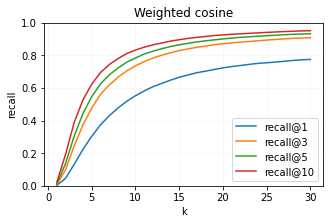

In [21]:
tops = [1,3,5,10]
plot_top_rec(tops, n_pred_ikeys_per_k_w, y_ikeys_w, title="Weighted cosine")
plt.savefig("figures/severity/topk_wcos.pdf", bbox_inches='tight')

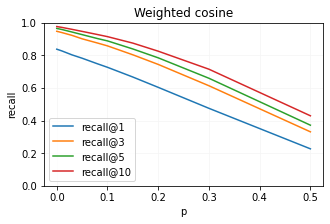

In [22]:
plot_miss_rec(tops, n_pred_ikeys_per_m_w, y_ikeys_w, probs, title="Weighted cosine")
plt.savefig("figures/severity/missm_wcos.pdf",bbox_inches='tight')

## Cosine vs cosine weighted

In [23]:
cos = [*map(lambda x: x[0], calc_for_top(1, n_pred_ikeys_per_k, y_ikeys))]
wcos = [*map(lambda x: x[0], calc_for_top(1, n_pred_ikeys_per_k_w, y_ikeys_w))]

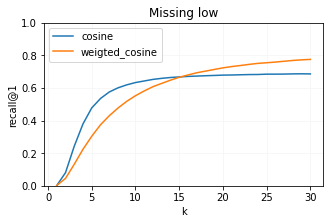

In [24]:
plt.figure(figsize=(5,3))
sns.lineplot(y=cos, x=range(1,len(cos)+1))
sns.lineplot(y=wcos, x=range(1,len(wcos)+1))
plt.ylim(0,1)
plt.ylabel("recall@1")
plt.xlabel("k")
plt.legend(["cosine", "weigted_cosine"])
plt.title("Missing low")
plt.grid(color = 'whitesmoke', linestyle = '-')

plt.savefig("figures/severity/topk_cos_wcos.pdf", bbox_inches='tight')

In [25]:
cos = [*map(lambda x: x[0], calc_for_random(1, n_pred_ikeys_per_m, y_ikeys))]
wcos = [*map(lambda x: x[0], calc_for_random(1, n_pred_ikeys_per_m_w, y_ikeys_w))]

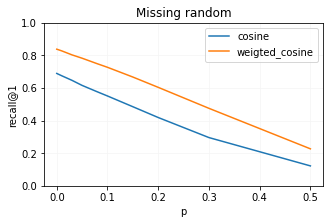

In [26]:
plt.figure(figsize=(5,3))
sns.lineplot(y=cos, x=probs)
sns.lineplot(y=wcos, x=probs)
plt.ylim(0,1)
plt.ylabel("recall@1")
plt.xlabel("p")
plt.legend(["cosine", "weigted_cosine"])
plt.title("Missing random")
plt.grid(color = 'whitesmoke', linestyle = '-')
plt.savefig("figures/severity/missm_cos_wcos.pdf", bbox_inches='tight')